# 预测未来 —— ARIMA 时间序列模型

In [5]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from  statsmodels.tsa.arima.model import ARIMA
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
print('🔮 正在启动 ARIMA 水晶球...')
df= ak.fund_open_fund_info_em(symbol='012363',indicator='单位净值走势')
df['date'] = pd.to_datetime(df['净值日期'])
df['price'] = pd.to_numeric(df['单位净值'])
df =df.sort_values('date').set_index('date')
data = df['price'].tail(20)



🔮 正在启动 ARIMA 水晶球...


In [7]:
# 2. 【核心】建立并训练模型
# order=(p, d, q) 是 ARIMA 的三个参数
# (5, 1, 0) 是一个经验参数：
# 5: 看过去 5 天 (AR)
# 1: 做 1 次差分 (I)
# 0: 不用移动平均纠错 (MA)
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()
print('✅ 模型训练完毕！')
print(model_fit.summary())
forecast_result = model_fit.forecast(steps=5)
print('\n🔮 未来 5 个交易日预测值：')
print(forecast_result)



✅ 模型训练完毕！
                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   20
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  61.319
Date:                Tue, 23 Dec 2025   AIC                           -110.639
Time:                        15:37:19   BIC                           -104.972
Sample:                    11-25-2025   HQIC                          -109.680
                         - 12-22-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1083      0.306     -0.354      0.723      -0.708       0.491
ar.L2         -0.0768      0.637     -0.121      0.904      -1.325       1.172
ar.L3         -0.2408      0.472     -0.51

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


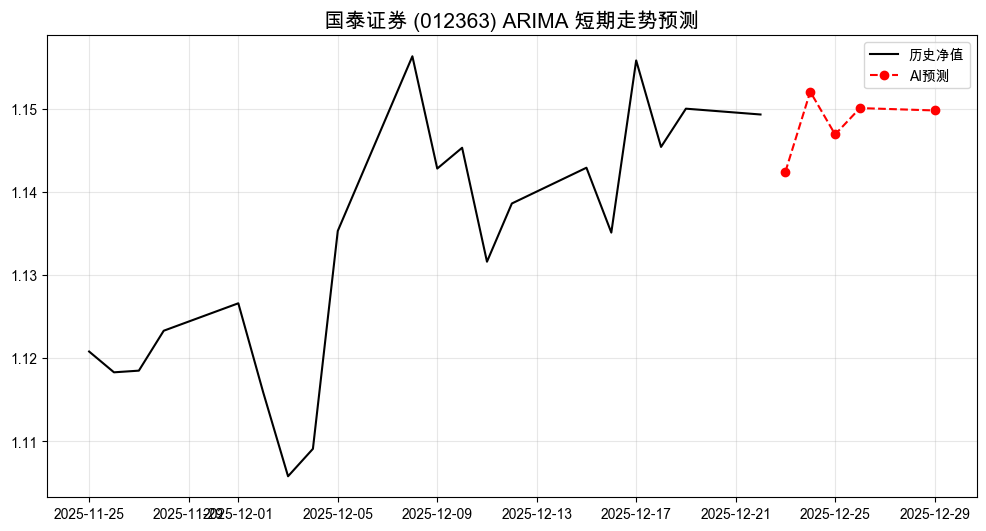

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data.index,data,label='历史净值',color='black')
plt.plot(forecast_result.index,forecast_result,label='AI预测',color='red',marker='o',linestyle='--')
plt.title('国泰证券 (012363) ARIMA 短期走势预测',fontsize=15)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

In [9]:
last_price = data.iloc[-1]
predict_price= forecast_result.iloc[-1]
gap = (predict_price - last_price)/last_price *100
print('-'*30)
print(f'当前价格:{last_price:.4f}')
print(f'5天后预测:{predict_price:.4f}')
print('AI 预测涨跌幅:{gap:.2f}%')
if gap > 1.0:
    print('🚀 结论：模型看涨！(建议拿住)')
elif gap < -1.0:
    print('🌊 结论：模型看跌！(建议谨慎)')
else:
    print('☁️ 结论：震荡行情。(多看少动)')

------------------------------
当前价格:1.1493
5天后预测:1.1498
AI 预测涨跌幅:{gap:.2f}%
☁️ 结论：震荡行情。(多看少动)
